# Inferential Statistic and the"New Statistic"

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

## Significance testing
Here, we will experiment with significance testing (how likely the effect observed in the sample exists in the population) and quantifying the effect sizes. We will work with some [Heart Disease data](https://moodle.city.ac.uk/pluginfile.php/2782674/mod_page/content/46/heart.csv) from US that came from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv) (see website for descriptions of the columns).

The `sex` column has a `0` for female and `1` for male. The target column indicated if the patient has heart disease and where (confusingly) `0` is for those with heart disease

### Preparation
1. Load the data into a pandas dataframe and create additional columns. Create `gender` and `hasHeartDisease` columns with the correct values (as above) to make it easier to read.

In [2]:
df = pd.read_csv('Heart.csv')

# Gender and disease indicator dictionaries
gender_dict = {1: "Male", 0: "Female"}
indicator_dict = {1: False, 0: True}

df['gender'] = df.sex.replace(gender_dict)
df['hasDisease'] = df.target.replace(indicator_dict)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender,hasDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Male,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Male,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Female,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Male,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Female,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,Female,True
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,Male,True
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,Male,True
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,Male,True


## Does the resting blood pressure (`trestbps`) differ between those with the disease and those without?
1. Calculate the means and standard deviations. How do they compare between groups and by how much? If someone asked you whether they vary, what would you say? Discuss in your groups.
2. Create boxplots and histograms to compare the means and distributions. Make sure you use the same scales on the axes. Tip: If using matplotlib, you might want to use `subplots(ncols=2,sharey=True)` to create two plots side-by-side with a shared y axis. Same question as above, do these value vary and by how much?
3. Compare the means using `scipy.stats.ttest_ind()` function. What is the p-value telling you? Does this relate to the judgements you made above?
4. Calculate Cohen's d. (Search for "cohen's d" on this page which gives the formula and also the formula for the pooled standard deviation which you also need. Note that it doesn't give the Python code directly - you may need to use `math.sqrt()` and `pow()`). Interpret this value and consider how it relates to your other interpretations (above).
5. Try some other (quantitative) variables and compare between heart disease groups. You could also compare by gender but there's probably no good reason to.
*Tip*: think about the different between statistical significance and effect size.

In [3]:
print("Mean - with disease:",df[df.hasDisease==True].trestbps.mean())
print("Mean - without disease:",df[df.hasDisease==False].trestbps.mean())

print("SD - with disease:",df[df.hasDisease==True].trestbps.std())
print("SD - without disease:",df[df.hasDisease==False].trestbps.std())

Mean - with disease: 134.3985507246377
Mean - without disease: 129.3030303030303
SD - with disease: 18.72994396158135
SD - without disease: 16.16961326687487


Those with heart disease have a higher blood pressure on average, but also have a slightly higher variation. However, the difference do not seem to be large.

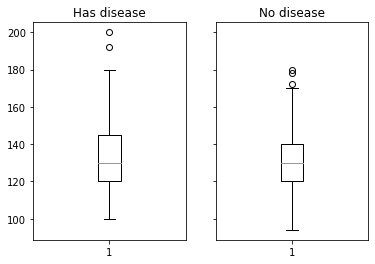

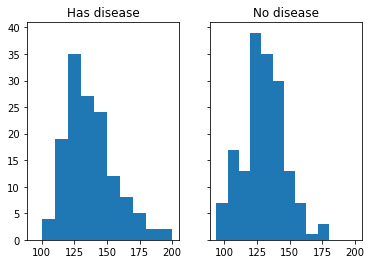

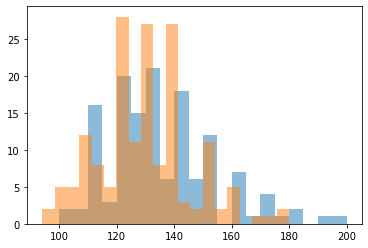

In [4]:
# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.boxplot(df[df.hasDisease==True].trestbps)
ax1.set_title('Has disease')
ax2.boxplot(df[df.hasDisease==False].trestbps)
ax2.set_title('No disease')
plt.show();

# Creating histogram
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.hist(df[df.hasDisease==True].trestbps)
ax1.set_title('Has disease')
ax2.hist(df[df.hasDisease==False].trestbps)
ax2.set_title('No disease')
plt.show();

# Over lapping histogram to check
plt.hist(df[df.hasDisease==True].trestbps, bins=20, alpha=0.5)
plt.hist(df[df.hasDisease==False].trestbps, bins=20, alpha=0.5)
plt.show()

It's perhaps even clearer that there's not a great deal of difference between these distributions. Note that we need to make sure they are on the same scale, using the sharex and sharey kwargs.

In [6]:
stats.ttest_ind(df[df.hasDisease==True].trestbps, df[df.hasDisease==False].trestbps, equal_var = False)

Ttest_indResult(statistic=2.5083466038526687, pvalue=0.012710946533525032)

The p-value is at around 0.01, which is conventionally "highly significant". This indicates that the effect (difference) is large enough to suggest that it exists in the population (assuming this is a random sample from the population that the distribution is normal.

But is this Kaggle datasets randomly drawn from the population? If not, even though it is significant, we've violated the assumption.

Remember that this significance is whether the effect likely to be found in the population.

Effect sizes are simple measure of the effect; e.g. the difference between the means. Now, let's calculate Cohen's d, which is a standardised version of this.

In [7]:
n1=df[df.hasDisease].trestbps.count()
n2=df[df.hasDisease==False].trestbps.count()
s1=df[df.hasDisease==False].trestbps.var()
s2=df[df.hasDisease==False].trestbps.var()
s = np.sqrt(((n1 - 1) * pow(s1,2) + (n2 - 1) * pow(s2,2) / (n1 + n2 - 2)))

u1=df[df.hasDisease].trestbps.mean()
u2=df[df.hasDisease==False].trestbps.mean()

d = (u1 - u2) / s

print(d)

0.0016617554542342494


Cohen's d conventionally can be interpreted as:
- Small Effect Size: d=0.20
- Medium Effect Size: d=0.50
- Large Effect Size: d=0.80

This is a minusule effect size, suggesting that it is *not* an important difference when compared to the variation in the data. But we suspected that and the boxplots suggested it.

## Is the proportion of men and women who get heart disease the same?
Calculate the proportion of men and women who have heart disease from the sample. To save you time, this code (is one of many ways that) will do it.

1. Look at the numbers in the table. Does there appear to be a difference?
2. We will use a Null Hypothesis Statistical Testing (NHST) to help determine whether this difference is likely to be present in the population. [Use the procedure outlined here](https://regenerativetoday.com/a-complete-guide-to-confidence-interval-and-calculation-in-python/) in the section labelled **"CI for the Difference in Population Proportion"**. I'd recommend you read the top part of the page too. What you'll be doing is:

    - Calculate the male population proportion with heart disease.
    - Calculate the standard error (estimate of standard deviation) for the male population proportion
    - Calculate the difference in the standard error of male and female population with heart disease
    - Use this standard error to calculate the difference in the population proportion of males and females with heart disease and construct the CI of the difference.
    - Interpret the result. Since the null hypothesis is that there's no difference, if the CI of the difference in the population proportion of males and females with heart disease contains 0, then we accept the null hypothesis (and reject the alternative hypothesis) with 95% confidence.  
    Note that the data are not quite the same (so values will be different) and columns have different names. Don't worry if you're not sure if the result is correct - we'll discuss next time.

3. What is your answer to the question: Is the proportion of men and women who get heart disease the same? Reflect on the NHST approach for doing this.

In [9]:
#Count the number with the disease for each gender type
hasDiseaseCount=df[df.hasDisease==True].groupby("gender").count().hasDisease

#Count the number of gender type
totalCount=df.groupby("gender").count()['hasDisease']

#combine into a dataframe (both are indexed with gender, so will be matched) and specify the columns
p=pd.concat([hasDiseaseCount, totalCount], axis=1)
p.columns = ["heartDiseaseCount", "totalCount"]

#create a new column and calculate the proportion
p['propHeartDisease']=p["heartDiseaseCount"]/p["totalCount"]

#print the results
p

,heartDiseaseCount,totalCount,propHeartDisease
gender,,,
Female,24,96,0.250000
Male,114,207,0.550725


Calculate the standard error (see [webpage](https://regenerativetoday.com/a-complete-guide-to-confidence-interval-and-calculation-in-python/)). This is an estimate of the standard deviation of the sample distribution.

In [12]:
p_fm = p.propHeartDisease.Female
n_fm = p.totalCount.Female
se_fm = np.sqrt(p_fm * (1 - p_fm) / n_fm)
se_fm

0.04419417382415922

Now calculate the **95% confidence interval**. This is the range within which you'd expect the true proportion to be within 95% other equivalent random samples. The [webpage](https://regenerativetoday.com/a-complete-guide-to-hypothesis-testing-and-examples-in-python/) shows how you can calculate it and also shows how we can use scipy's `proportion_confint()` function which gives the same result).

In [14]:
z_score = 1.96
lcb = p_fm - z_score * se_fm # Lower limit of the CI
ucb = p_fm + z_score * se_fm # Upper limit of the CI
print(lcb)
print(ucb)
print(sm.stats.proportion_confint(n_fm * p_fm, n_fm))

0.16337941930464794
0.33662058069535206
(0.1633810109781451, 0.3366189890218549)


So the mean proportion of heart disease for females is 0.25 and we are 95% confident that the true mean (of the population) is between 0.16 and 0.33.

Now let's do the same for males.

In [15]:
p_male = p.propHeartDisease.Male
n_male = p.totalCount.Male
se_male = np.sqrt(p_male * (1 - p_male) / n_male)
print(se_male)

0.0345731047302169


In [17]:
se_diff = np.sqrt(se_fm**2 + se_male**2)
se_diff

0.05611082400648334

In [18]:
d = p_male-p_fm
lcb = d - z_score * se_diff  #lower limit of the CI
ucb = d + z_score * se_diff  #upper limit of the CI
print([lcb,ucb])

[0.19074742262845207, 0.4107018527338668]


As explained, the CI does contain 0 (no difference), so we do not have enough evidence to conclude that there is no difference between the proportion of females and males with heart disease.